# Data Loading, Storage and File Formats
Problem Statement: Analyzing Sales Data from Multiple File Formats
Dataset: Sales data in multiple file formats (e.g., CSV, Excel, JSON)
Description: The goal is to load and analyze sales data from different file formats, including
CSV, Excel, and JSON, and perform data cleaning, transformation, and analysis on the
dataset.
Tasks to Perform:
Obtain sales data files in various formats, such as CSV, Excel, and JSON.
1. Load the sales data from each file format into the appropriate data structures or
dataframes.
2. Explore the structure and content of the loaded data, identifying any inconsistencies,
missing values, or data quality issues.
3. Perform data cleaning operations, such as handling missing values, removing
duplicates, or correcting inconsistencies.
4. Convert the data into a unified format, such as a common dataframe or data structure,
to enable seamless analysis.
5. Perform data transformation tasks, such as merging multiple datasets, splitting
columns, or deriving new variables.
6. Analyze the sales data by performing descriptive statistics, aggregating data by
specific variables, or calculating metrics such as total sales, average order value, or
product category distribution.
7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales
data and gain insights into sales trends, customer behavior, or product performance.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load CSV data
csv_data = pd.read_csv('customers.csv')

# Load Excel data
excel_data = pd.read_excel('customers.xlsx', engine='openpyxl')   #openpyxl supports new excel formats

# Load JSON data
with open('customers.json', 'r') as json_file:
    json_data = json.load(json_file)
json_data = pd.DataFrame(json_data)

csv_data

In [ ]:
# Explore the structure and content of the loaded data
# Identify missing values and data quality issues

print("Structure and Info of CSV Data:")
print(csv_data.info())
print("\nMissing Values in CSV Data:")
print(csv_data.isnull().sum())

print("\nStructure and Info of Excel Data:")
print(excel_data.info())
print("\nMissing Values in Excel Data:")
print(excel_data.isnull().sum())

print("\nStructure and Info of JSON Data:")
print(json_data.info())
print("\nMissing Values in JSON Data:")
print(json_data.isnull().sum())

In [ ]:
# Handling missing values

csv_data.fillna(0, inplace=True)       #replace missing with 0
excel_data.fillna(0, inplace=True)    #replace missing with 0
json_data.fillna(0, inplace=True)     #replace missing with 0

csv_data.drop_duplicates(inplace=True) #remove duplicates from all columns
excel_data.drop_duplicates(subset=['first_name', 'last_name'], inplace=True) #remove duplicates from ["first_name", "last_name"]
json_data.drop_duplicates(subset=['first_name', 'last_name'], inplace=True) #remove duplicates from ["first_name", "last_name"]

# Print the cleaned data

In [ ]:
# Merge the datasets
common_df = pd.concat([csv_data, excel_data, json_data], ignore_index=True)

In [ ]:
# Split a column and create new variables
common_df['phone_area_code'] = common_df['phone'].str.extract(r'(\d+)')
# Derive a new variable
common_df['full_name'] = common_df['first_name'] + " " + common_df['last_name']

# Print the transformed DataFrame
common_df

,first_name,last_name,email,phone,address,gender,age,registered,orders,spent,job,hobbies,is_married,phone_area_code,full_name
0,Joseph,Rice,josephrice131@slingacademy.com,+1-800-040-3135x6208,"91773 Miller Shoal\nDiaztown, FL 38841",male,43,2019-05-05,7,568.29,Artist,Playing sports,False,1,Joseph Rice
1,Gary,Moore,garymoore386@slingacademy.com,221.945.4191x8872,"6450 John Lodge\nTerriton, KY 95945",male,71,2020-05-20,11,568.92,Artist,Swimming,True,221,Gary Moore
2,John,Walker,johnwalker944@slingacademy.com,388-142-4883x5370,"27265 Murray Island\nKevinfort, PA 63231",male,44,2020-04-04,11,497.12,Clerk,Painting,False,388,John Walker
3,Eric,Carter,ericcarter176@slingacademy.com,(451)259-5402,USNS Knight\nFPO AA 76532,male,38,2019-01-30,17,834.60,Butcher,Playing musical instruments,False,451,Eric Carter
4,William,Jackson,williamjackson427@slingacademy.com,625.626.9133x374,"170 Jackson Loaf\nKristenland, AS 48876",male,58,2022-07-01,14,151.59,Engineer,Reading,False,625,William Jackson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Alexis,Williams,alexiswilliams395@slingacademy.com,(659)856-5718x2171,76824 Richards Extensions Suite 123\nDenisevie...,female,34,2019-07-16T00:00:00.000,4,351.18,Firefighter,Sewing,False,659,Alexis Williams
2996,Karen,Mendez,karenmendez129@slingacademy.com,0339203729,"48875 Brown Street\nEast Michelleburgh, KS 22960",female,35,2020-01-30T00:00:00.000,2,45.27,Janitor,Baking,False,0339203729,Karen Mendez
2997,Michaela,Smith,michaelasmith815@slingacademy.com,+1-106-147-6378x3133,"576 Little Lights Suite 465\nSouth Johnny, PR ...",female,23,2019-02-22T00:00:00.000,9,381.57,Chef,Drawing,True,1,Michaela Smith
2998,Kathleen,Scott,kathleenscott395@slingacademy.com,(788)465-5647x419,5655 Gross Prairie Suite 656\nWest Jenniferbur...,female,72,2019-05-23T00:00:00.000,8,855.10,Clerk,Meditation,True,788,Kathleen Scott


In [ ]:
# Perform descriptive statistics
desc_stats = common_df.describe() #get descriptive stats

agg_data = common_df.groupby('job').agg({'orders': 'sum', 'spent': 'mean'})  #group by job and calc total sales and avg order value

total_sales = common_df['spent'].sum() #calc total sales

average_order_value = common_df['spent'].mean() #avg order value

product_distribution = common_df['job'].value_counts()     # calculate product category distribution

# print(desc_stats)
# print(agg_data.sort_values(by="spent"))
# print(product_distribution)

               age       orders        spent
count  3000.000000  3000.000000  3000.000000
mean     48.145000    10.036000   496.295100
std      18.346339     6.173606   289.132777
min      18.000000     0.000000     0.490000
25%      32.000000     5.000000   248.100000
50%      47.000000    10.000000   469.045000
75%      64.000000    15.000000   739.660000
max      80.000000    20.000000   999.150000
                orders       spent
job                               
Farmer             627  417.005217
Polic              738  418.494400
Firefighter        795  421.117692
Nurse              753  430.046296
Butcher            975  430.244687
Unemployed        1017  433.800000
Librarian          408  445.107143
Barber            1038  453.617143
Tailor            1014  463.127059
Baker              981  469.264194
Housewife          786  470.946154
Teacher            780  473.012500
Hairdresser        828  474.699259
Scientist          648  475.320476
Waitress           903  475.518889


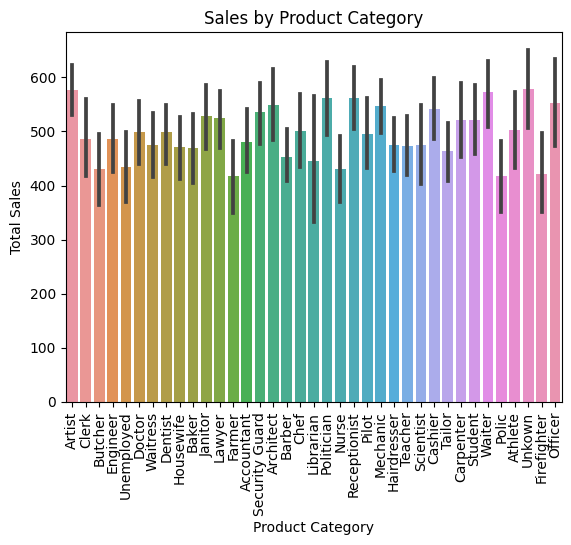

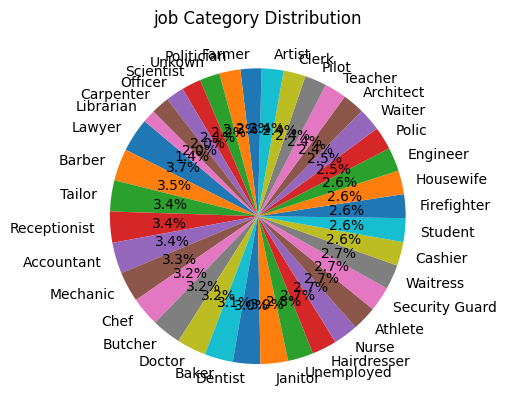

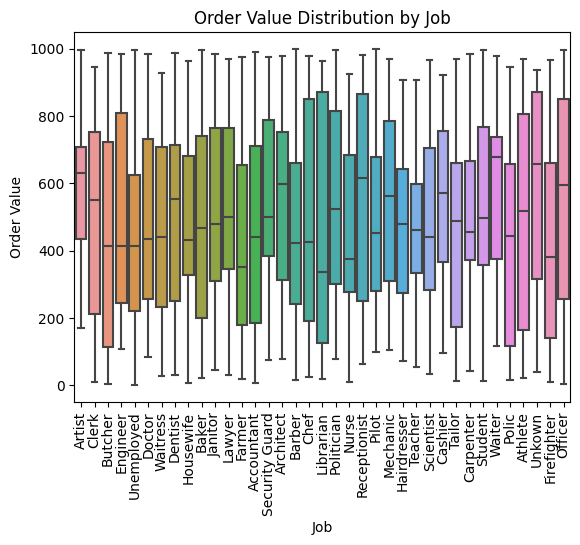

In [ ]:
# Create a bar plot to represent sales by product category
sns.barplot(x='job', y='spent', data=common_df)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

# Create a pie chart to represent the distribution of product categories
product_distribution = common_df['job'].value_counts()
plt.pie(product_distribution, labels=product_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('job Category Distribution')
plt.xticks(rotation=90)
plt.show()

# Create a box plot to visualize the distribution of order values
# sns.boxplot(x='job', y='spent', data=common_df)
plt.title('Order Value Distribution by Job')
plt.xlabel('Job')
plt.ylabel('Order Value')
plt.xticks(rotation=90)
plt.show()